In [83]:
import networkx as nx
G = nx.Graph()

import matplotlib.pyplot as plt

In [84]:
from dataclasses import dataclass

@dataclass
class User:
    name: str
    surname: str
    uses_our_service: bool
    
    def __str__(self):
        return f"{self.name} {self.surname}, uses our service: {self.uses_our_service}"
    
    def __repr__(self):
        
        return f"{self.name} {self.surname}, uses our service: {self.uses_our_service}"

In [85]:
User("John", "Doe", True)

John Doe, uses our service: True

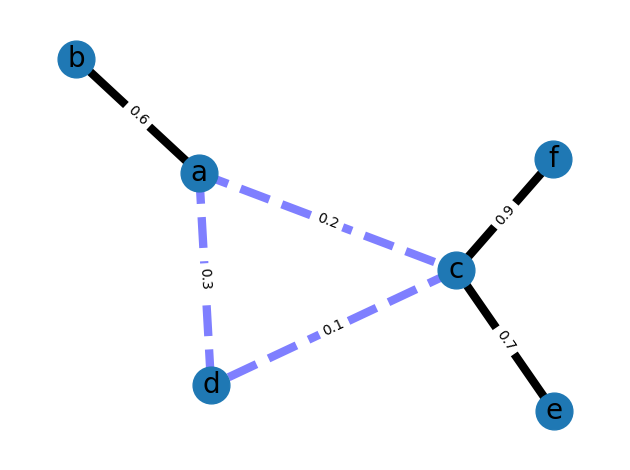

In [86]:
import matplotlib.pyplot as plt
import networkx as nx

# set matplotlib white background

plt.rcParams["figure.facecolor"] = "white"

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
from typing import Union

def static_vars(**kwargs):
    def decorate(func):
        for k in kwargs:
            setattr(func, k, kwargs[k])
        return func
    return decorate

class SimplexNoiseBounded:
    """Simplex noise generator

    This is a simplex noise generator, it is used to generate a random value between 0. and 1.,
    the value oscillates as a function of time, but it is not periodic.

    It might be used to enrich the simulation with random events.
    """

    def __init__(self, seed: int = 42):
        """__init__ Initializes the simplex noise generator

        Parameters
        ----------
        seed : int, optional
            The seed for the random number generator, by default 42
        """
        np.random.seed(seed)
        self.coeffs = np.random.rand(3)
        self.coeffs = (
            self.coeffs * [np.sqrt(2), np.exp(1), np.pi] / self.coeffs.sum()
        )

        self.func = lambda i: 1 / 6 * np.sin(self.coeffs * i).sum() + 0.5

        
        
        self.i: float = 0.0
        self.step: float = 0.1

    def __call__(self, t: Union[float, None] = None):
        """__call__ Calls the simplex noise generator

        Parameters
        ----------
        t : float, optional
            A time value, if not given it will step an internal counter, by default None

        Returns
        ------
        float
            a traffic coefficient, between 0. and 1.2
        """
        if not t:
            retval = self.func(self.i)
            self.i += self.step

        else:
            retval = self.func(t)

        return retval

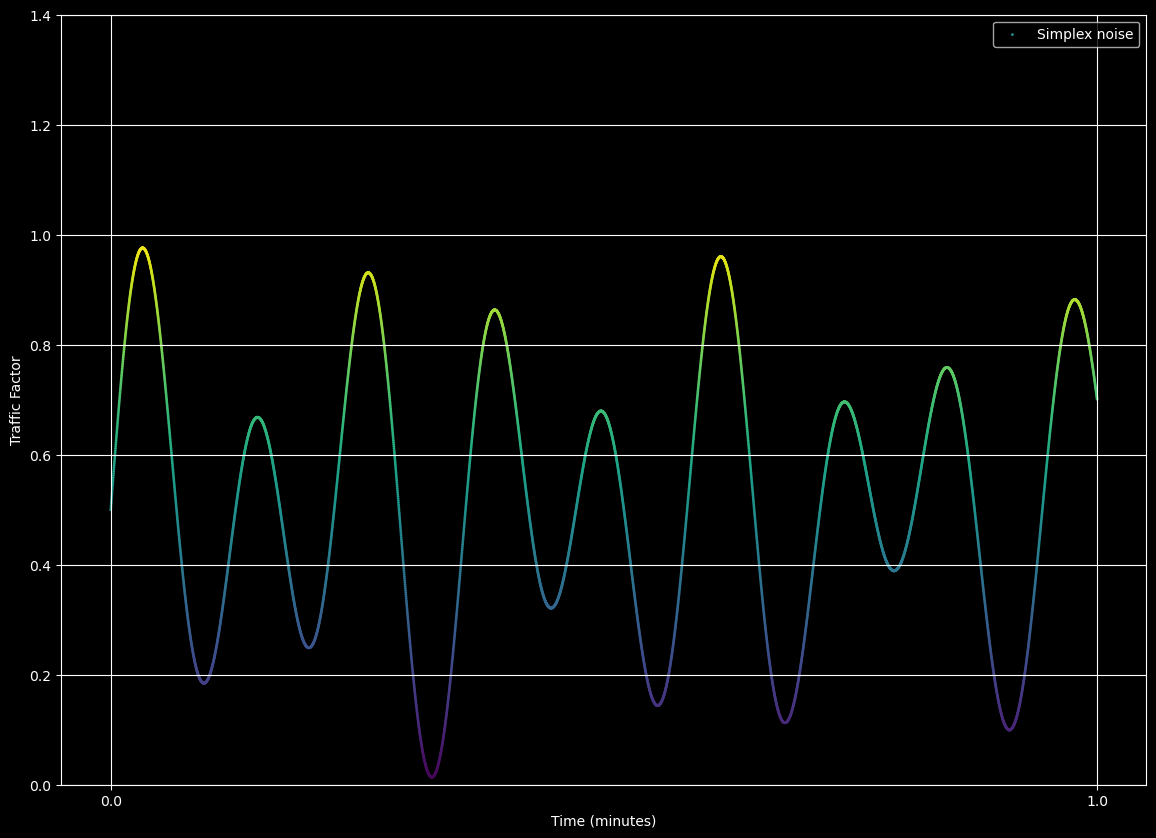

In [6]:
import matplotlib.pyplot as plt
import random

from matplotlib import cm


SECONDS: int = 60


gen = SimplexNoiseBounded(seed=random.randint(0, 1000))

x = np.arange(0, SECONDS, 0.01)

samples = [gen(i) for i in x]

invert = lambda x: 1 - x

plt.scatter(x, samples, label="Simplex noise", c=cm.viridis(samples), s=1)
plt.grid()
plt.legend()
plt.ylim(0, 1.4)

# display x axis as time in minutes

plt.xticks(np.arange(0, SECONDS + 60, 60), np.arange(0, SECONDS + 60, 60) / 60)

# widen the plot

plt.gcf().set_size_inches(14, 10)

plt.xlabel("Time (minutes)")
plt.ylabel("Traffic Factor")

plt.show()




In [ ]:
import seaborn as sns

<Axes: ylabel='Count'>

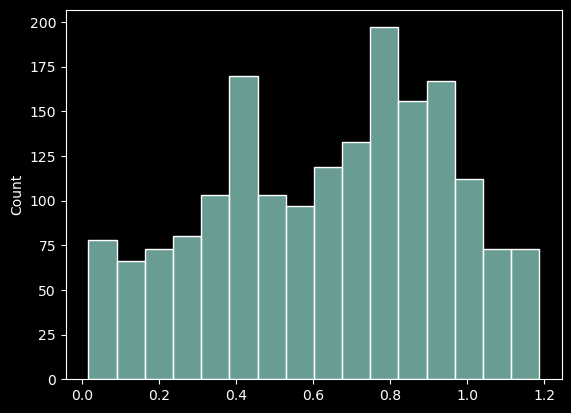

In [ ]:
sns.histplot(samples)

In [ ]:
print(max(samples), min(samples))

1.170199795682798 0.051493962298755136


In [ ]:
gen.coeffs

array([0.37295996, 1.62530166, 0.43467835])